# Cardiovascular disease prediction model

##import Libraries

In [233]:
## Data Maipulation Libraries
import numpy as np
import pandas as pd
## Data Visualisation Libraray
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import seaborn as sns
import tensorflow as tf
import os
import pathlib
import cv2
import string
from keras import layers, models
import matplotlib.pyplot as plt
from keras import backend as K
#from keras.preprocessing.image import ImageDataGenerator
import tensorflow_probability as tfp
tfd = tfp.distributions

## Load dataset

In [234]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
url = '/content/drive/My Drive/Bit crew resources/cardio_train.csv'
df = pd.read_csv(url,delimiter=';')

In [236]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [237]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [238]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [239]:
df.shape

(70000, 13)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [241]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
# Changing AGE from days format to year format
def age_years(age):
    ages = age /365.25
    return ages
'''This function divides age by 365 to give it in years'''

df['age'] = df['age'].apply(age_years)
#round it up into a whole number uaing numpy.ceil
df['age'] = df['age'].astype(float).apply(np.ceil)

In [243]:

# converting new age column data type back to integer
df['age']= df['age'].astype(int)

df['age'].head(5)

,age
0,51
1,56
2,52
3,49
4,48


In [244]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,53,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,62,1,163,72.0,135,80,1,2,0,0,0,1


Age, Gender (1-Female, 2-Male), Height, Weight, Systolic BP, Diastolic BP,

Cholesterol - 1 normal, 2 above normal, 3 well above normal

Glucose - 1 normal, 2 above normal, 3 well above normal

Smoking, Alcohol intake, Physical activity

In [245]:
df[['gender','cholesterol','gluc','smoke','alco','active','cardio']] = df[['gender','cholesterol','gluc','smoke','alco','active','cardio']].astype(str)


In [246]:
df.rename(columns={'ap_hi': 'sys_bp', 'ap_lo': 'dia_bp'}, inplace=True)

In [247]:
df.head()

,id,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [248]:
# delete id column because it is not necessary to analysis
df = df.drop(columns = ['id'])

In [249]:
#Adding a new column 'BMI' to the data frame
df['bmi']=(df['weight']/(df['height'] **2) * 10000)
df['bmi']=df['bmi'].round(decimals = 1)

In [250]:
df.describe()

,age,height,weight,sys_bp,dia_bp,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.801886,164.359229,74.205690,128.817286,96.630414,27.555330
std,6.762498,8.210126,14.395757,154.011419,188.472530,6.092593
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.500000
25%,49.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.400000
75%,59.000000,170.000000,82.000000,140.000000,90.000000,30.200000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.700000


In [251]:
df

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,51,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,56,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,49,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0,26.9
69996,62,1,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,53,2,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,62,1,163,72.0,135,80,1,2,0,0,0,1,27.1


In [252]:
df.corr()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.022755,-0.081349,0.053553,0.020935,0.017541,0.154017,0.098505,-0.047453,-0.029635,-0.009839,0.237935,0.085359
gender,-0.022755,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.096377
height,-0.081349,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.290347
weight,0.053553,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.762154
sys_bp,0.020935,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.024861
dia_bp,0.017541,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.035351
cholesterol,0.154017,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.146253
gluc,0.098505,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.101373
smoke,-0.047453,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.027157
alco,-0.029635,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.014399


<Axes: >

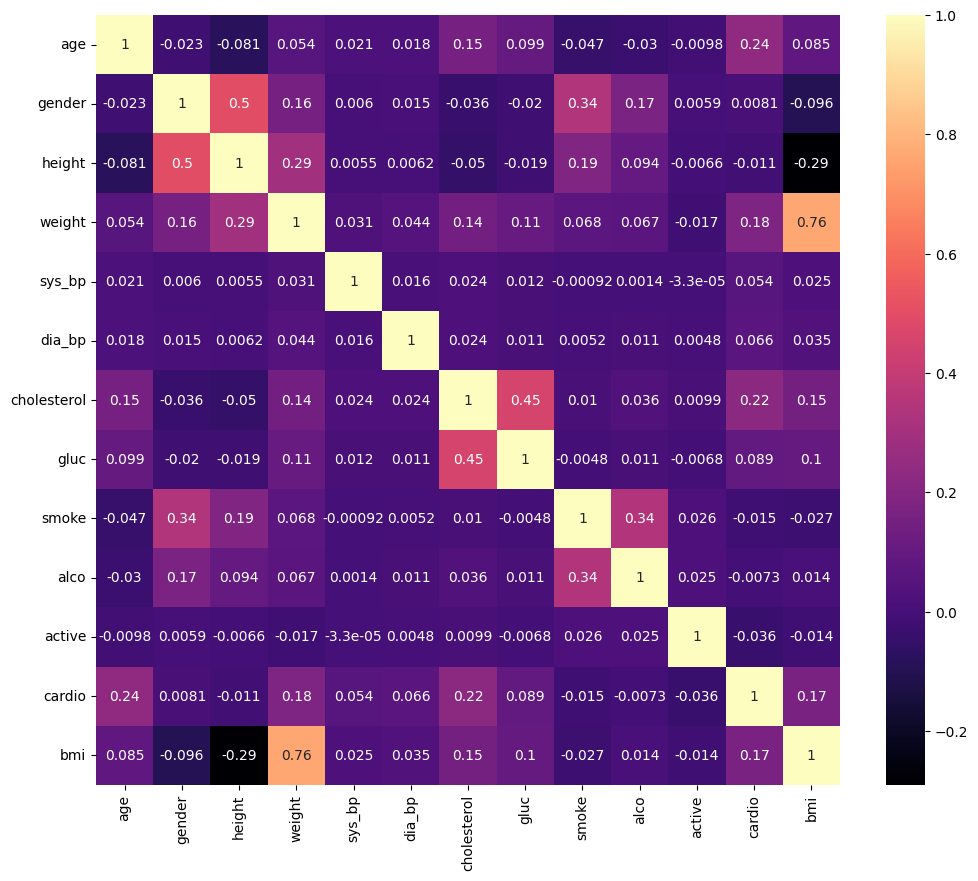

In [253]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='magma')


The main causes of cardiovascular disease are high blood pressure, overweight, smoking and cholestrol.

From this correlation graph we can see that only age, weight and cholestrol are having some impact on the output variable. Also, blood pressure is not having any importance on the output. This is due to the pressence of outliers.

In [254]:
#Replacing values in column with corresponding variable names (1 = Female, 2 = Male)
df['gender'] = df['gender'].replace({'1': 'Female', '2': 'Male'})
df['cholesterol'] = df['cholesterol'].replace({'1': 'Normal', '2': 'High', '3': 'Extremely High'})
df['gluc'] = df['gluc'].replace({'1': 'Normal', '2': 'High', '3': 'Extremely High'})
df['smoke'] = df['smoke'].replace({'0': 'No', '1': 'Yes'})
df['alco'] = df['alco'].replace({'0': 'No', '1': 'Yes'})
df['active'] = df['active'].replace({'0': 'No', '1': 'Yes'})
df['cardio'] = df['cardio'].replace({'0': 'No', '1': 'Yes'})

In [255]:
df.head()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0
1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9
2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5
3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7
4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0


# Data visualization



## 1.   Univariate Exploration


## Histplot

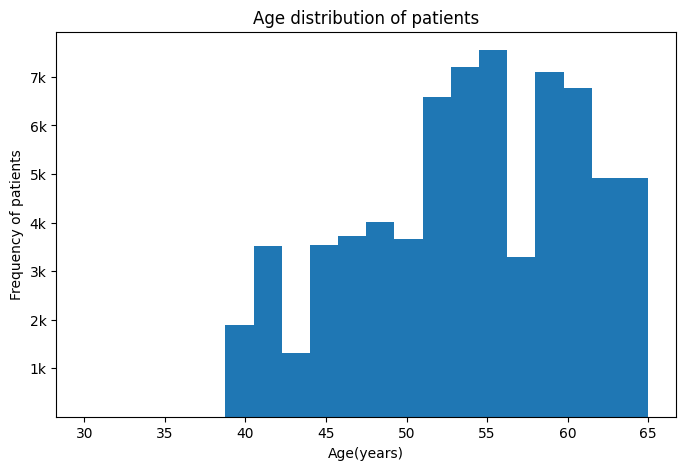

In [256]:
#setting figure size
plt.figure(figsize =[8,5])
#setting ticks and labels
ticks=[1000,2000,3000,4000,5000,6000,7000]
labels=['1k','2k','3k','4k','5k','6k','7k']
#using a standard scaled Hist plot
plt.hist(data= df, x ='age',bins= 20)
plt.yticks(ticks,labels)
#setting title and  axis label
plt.title('Age distribution of patients')
plt.ylabel('Frequency of patients')
plt.xlabel('Age(years)')
plt.show()


##Observation:
There seems to be some outliers from 40 below to 30,which is the minimum from the summary statistics. After applying a limit to the x axis. The distribution is a bimodal one with peaks at 56 and 59 respectively and a majority of the distribution of patients are between 50 and 65 . It is also observed that this dataset involves adults only.

### Using a standard scaled Hist plot and subplot

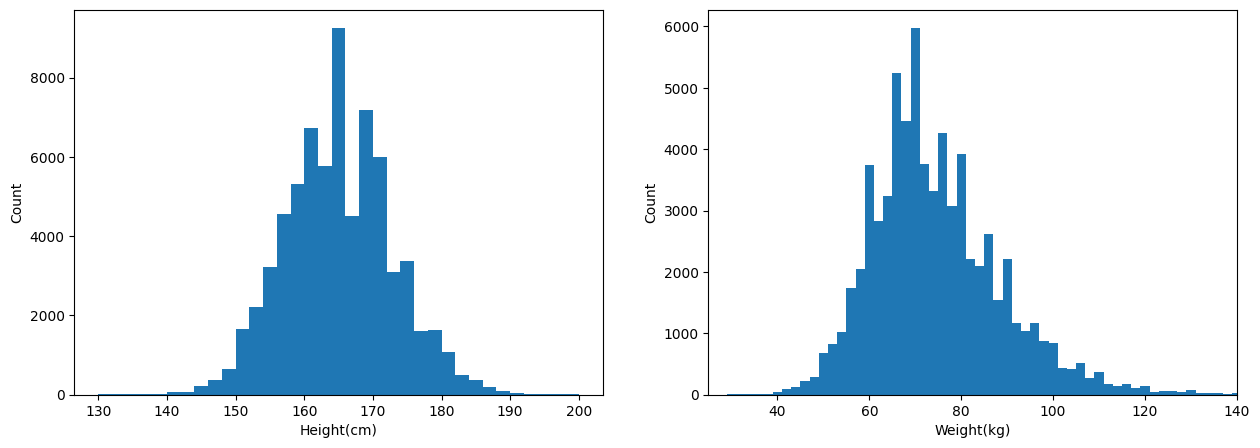

In [257]:
#using a standard scaled Hist plot and subplot
plt.figure(figsize = [15,5])

#For the first plot
plt.subplot(1, 2, 1)
binsize = 2
bins = np.arange(130,200+binsize,binsize)
plt.hist(data=df,x='height',bins = bins)
plt.xlabel('Height(cm)')
plt.ylabel('Count')

#For the second plot
plt.subplot(1, 2, 2)
binsize = 2
bins = np.arange(25,150+binsize,binsize)
plt.hist(data=df,x='weight',bins=bins)
plt.xlim([25,140])
plt.xlabel('Weight(kg)')
plt.ylabel('Count');


The heights appear to be normally distributed, with a peak at its center. There are fewer outliers that are taller or shorter. The peak is around 165cm height which is an average height of adults.        
The weights seemed to be skewed to the right, most of the distributions are between 40kg and 120kg. The peak is around 71kg which is an average weight of adults.    
       Both are unimodal distribution

##countplot
(cholesterol)

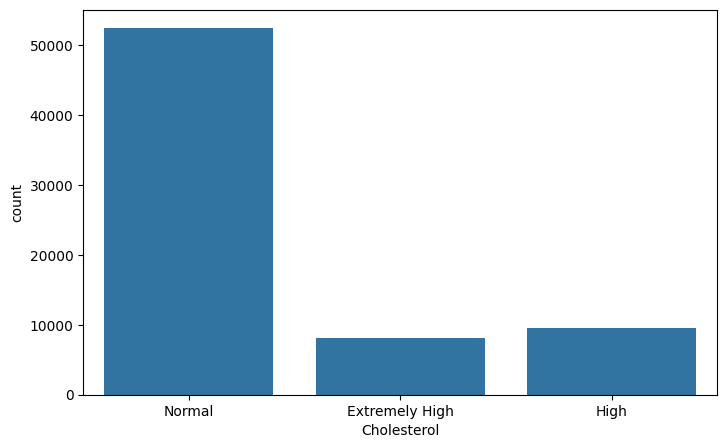

In [258]:
import seaborn as sb
#setting figure size
plt.figure(figsize = [18,5])

#Setting my base color
base_color = sb.color_palette()[0]

#Using seaborns countplot and subplot
#First plot
plt.subplot(1, 2, 1)
sb.countplot(data = df,x ='cholesterol',color=base_color);
plt.xlabel('Cholesterol');

more than 50,000 patients have a normal cholestrol level. Patients with high cholestrol are slightly more than extremely high level

## (glucose)

Text(0.5, 0, 'Glucose')

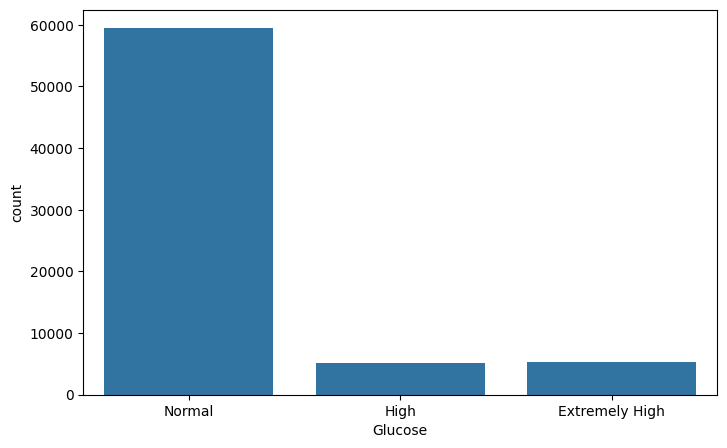

In [259]:
plt.figure(figsize = [18,5])
plt.subplot(1,2,2)
sb.countplot(data = df,x ='gluc',color=base_color);
plt.xlabel('Glucose')

around 60000 people have normal glucose levels and there are around 5000 people having high glucose and extremely high glucose levels.

##BMI

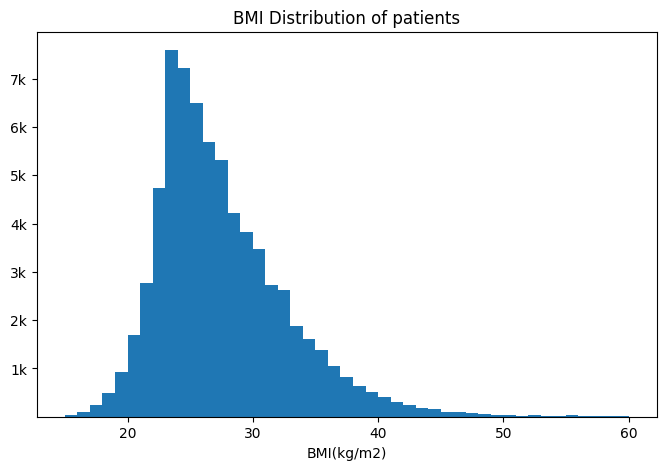

In [260]:
#Using a standard hist plot and setting bin size
binsize = 1
bin_edge = np.arange(15,60+binsize,binsize)
plt.figure(figsize=[8,5])
plt.hist(data= df, x ='bmi',bins=bin_edge)
#setting ticks and labels
ticks=[1000,2000,3000,4000,5000,6000,7000]
labels=['1k','2k','3k','4k','5k','6k','7k']
plt.yticks(ticks,labels)

plt.title('BMI Distribution of patients')
plt.xlabel('BMI(kg/m2)')
plt.show()

This is unimodal right skewed distribution with outliers present from 60kg/m2. The peak is around 24kg/m2, which is average BMI of adults. This plays a major role in predicting cardiovascular disease.

## Bar plot

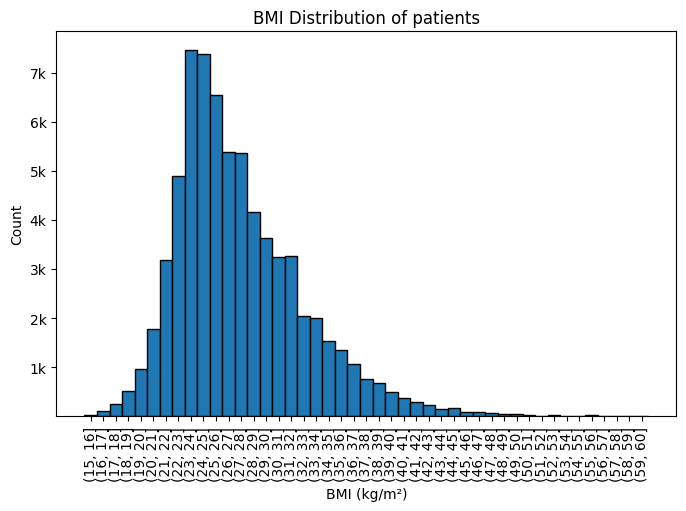

In [261]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is already defined and contains the 'bmi' column

# Setting bin size and bin edges
binsize = 1
bin_edge = np.arange(15, 60 + binsize, binsize)

# Bin the data and count the number of occurrences in each bin
binned_data = pd.cut(df['bmi'], bins=bin_edge)
binned_counts = binned_data.value_counts().sort_index()

# Setting figure size
plt.figure(figsize=[8, 5])

# Creating a bar plot
plt.bar(binned_counts.index.astype(str), binned_counts.values, width=1.0, edgecolor='black')

# Setting ticks and labels for the y-axis
ticks = [1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = ['1k', '2k', '3k', '4k', '5k', '6k', '7k']
plt.yticks(ticks, labels)

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Setting title and x-axis label
plt.title('BMI Distribution of patients')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Count')

# Displaying the plot
plt.show()



The same BMI data but in the bar plot. Here we can clearly see that the peak is at 23-24kg/m2.

##Donught Chart

Text(0.5, 1.0, 'Alcohol intake')

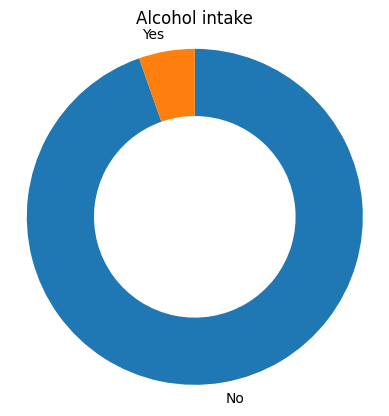

In [262]:

#setting my column unique value count
category = df['alco'].value_counts()
#Using matplotlib donught chart
plt.pie(category, labels = category.index,startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title('Alcohol intake')

Here as we can see, most of the people don't consume alcohol,like more than 3/4th of them. Studies shows that high persent of cardiovascular diseased patients drink alcohol, which proves alcohol as one of the risk factors of cardiovascular diseases.

##Pie Chart

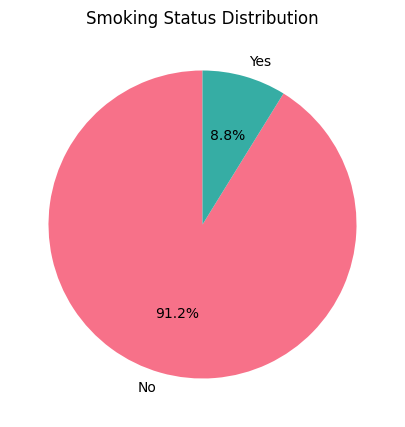

In [263]:
# Assuming df is already defined and contains the 'smoke' and 'gender' columns

# Count the occurrences of each category in the 'smoke' column
smoke_counts = df['smoke'].value_counts()

# First plot: Pie chart for 'smoke'
plt.figure(figsize=[8,5])
plt.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(smoke_counts)))
plt.title('Smoking Status Distribution')
plt.show()



As per the pie chart, around 91% of the patients do not smoke, less than 10% of the patients do smoke. Smoking is also one of the risk factors of the cardiovascular diseases.

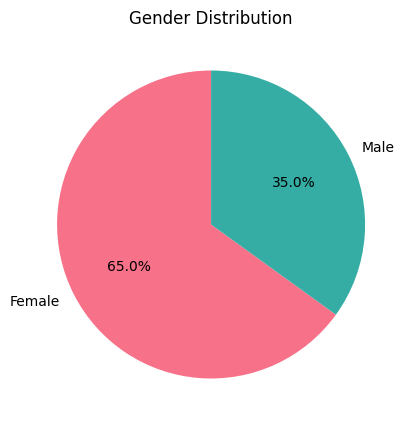

In [264]:

gender_counts = df['gender'].value_counts()

# Second plot: Pie chart for 'gender'
plt.figure(figsize=[8, 5])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(gender_counts)))
plt.title('Gender Distribution')
plt.show()

There are more female patients than male

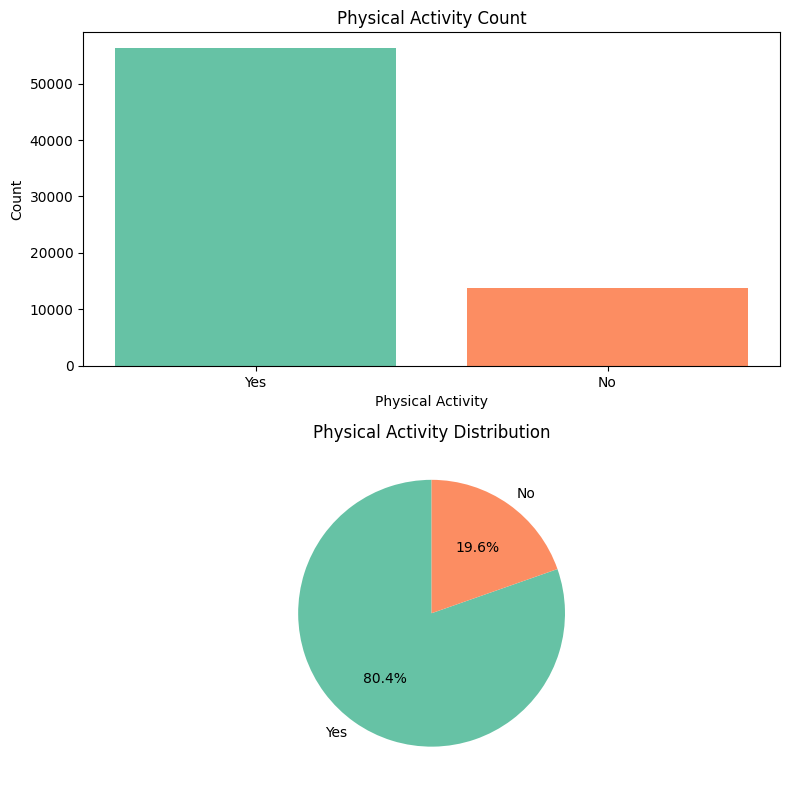

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the 'physical_activity' column

# Count the occurrences of each category in the 'physical_activity' column
activity_counts = df['active'].value_counts()

# Setting up the figure
fig, ax = plt.subplots(nrows=2, figsize=[8, 8])

# Define a new color palette
custom_colors = sns.color_palette("Set2", len(activity_counts))

# First plot: Pie chart for 'physical_activity'
ax[1].pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
ax[1].set_title('Physical Activity Distribution')

# Bar chart for 'physical_activity'
ax[0].bar(activity_counts.index, activity_counts, color=custom_colors)
ax[0].set_title('Physical Activity Count')
ax[0].set_xlabel('Physical Activity')
ax[0].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()


As per the charts above, there are more than 50000(80%) patients who does physical activities and less than 20000(20%) patients who do not do physical activities. Physical activities are important to avoid cardiovascular diseases.

## Box Plot

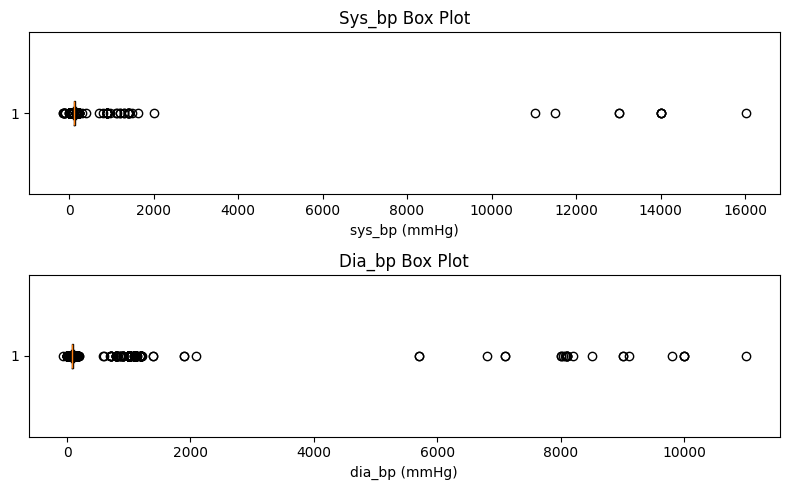

In [266]:
# Example DataFrame (replace with your actual data)
np.random.seed(10)
df1 = pd.DataFrame({
    'sys_bp': np.random.normal(120, 10, 100),
    'dia_bp': np.random.normal(80, 5, 100)
})

# Variables to plot
bp_variables = ['sys_bp', 'dia_bp']

# Create subplots
fig, ax = plt.subplots(nrows=2, figsize=[8, 5])

# Plot boxplots
for i in range(len(bp_variables)):
    var = bp_variables[i]
    ax[i].boxplot(df[var], vert=False)
    ax[i].set_xlabel('{} (mmHg)'.format(var))
    ax[i].set_title('{} Box Plot'.format(var.capitalize()))

# Adjust layout and show plot
plt.tight_layout()
plt.show()


As we can see from the above box plots of Systolic and Diastolic Blood Pressure, there are many outliers. Lets see how many high and low outliers are present below.

In [267]:
#selecting and filtering out the outliers using criteria outballed from the plots
#Viewing the extreme high outliers in the dataset
high_outliers = (df['sys_bp']> 250) | (df['dia_bp'] >120)
print(high_outliers.sum())
print(df.loc[high_outliers,:])

1096
       age  gender  height  weight  sys_bp  dia_bp cholesterol    gluc smoke  \
228     48    Male     183    98.0     160    1100      Normal    High   Yes   
241     61    Male     157    60.0     160    1000        High  Normal    No   
260     50  Female     150    83.0     140     800      Normal  Normal    No   
329     65  Female     176    63.0     160    1000        High    High    No   
345     52  Female     154    81.0     140    1000        High  Normal    No   
...    ...     ...     ...     ...     ...     ...         ...     ...   ...   
69771   64  Female     167    81.0     160    1000      Normal  Normal    No   
69872   60  Female     152    56.0     160    1000      Normal  Normal    No   
69878   59    Male     168    95.0     160    1000      Normal  Normal    No   
69885   62    Male     166    78.0     170    1000      Normal  Normal    No   
69967   59    Male     168    63.0     140    1000      Normal  Normal    No   

      alco active cardio   bmi  
2

In [268]:
low_outliers =(df['sys_bp']<40) | (df['dia_bp'] <40)
print(low_outliers.sum())
print(df.loc[low_outliers,:])

242
       age  gender  height  weight  sys_bp  dia_bp     cholesterol  \
418     46  Female     157    72.0     150      30          Normal   
567     59  Female     168    78.0      14      90            High   
927     60    Male     175    70.0      14      90  Extremely High   
979     50  Female     172    65.0      11      80          Normal   
1600    53  Female     165    66.0      12      80          Normal   
...    ...     ...     ...     ...     ...     ...             ...   
68663   50  Female     156    41.0     906       0          Normal   
68742   52  Female     158    74.0      14      90          Normal   
68998   53  Female     154    77.0      14      90          Normal   
69137   43    Male     176    65.0      12      80          Normal   
69549   59  Female     155    69.0      13      90          Normal   

                 gluc smoke alco active cardio   bmi  
418            Normal    No   No    Yes    Yes  29.2  
567            Normal    No   No    Yes    Ye

In [269]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['dia_bp']> df['sys_bp']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


So we saw there are 1096 high outliers and 242 low outliers. Later, diastolic pressure is never higher than systolic pressure and those are 1234 cases.
Blood Pressure could never be negative as well.
Now we are going to drop both of them.

In [270]:
# df.drop(df[(df['sys_bp'] > df['sys_bp'].quantile(0.975)) | (df['sys_bp'] < df['sys_bp'].quantile(0.025))].index,inplace=True)
# df.drop(df[(df['dia_bp'] > df['dia_bp'].quantile(0.975)) | (df['dia_bp'] < df['dia_bp'].quantile(0.025))].index,inplace=True)

In [271]:
# blood_pressure = df.loc[:,['dia_bp','sys_bp']]
# sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
# print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['dia_bp']> df['sys_bp']].shape[0]))

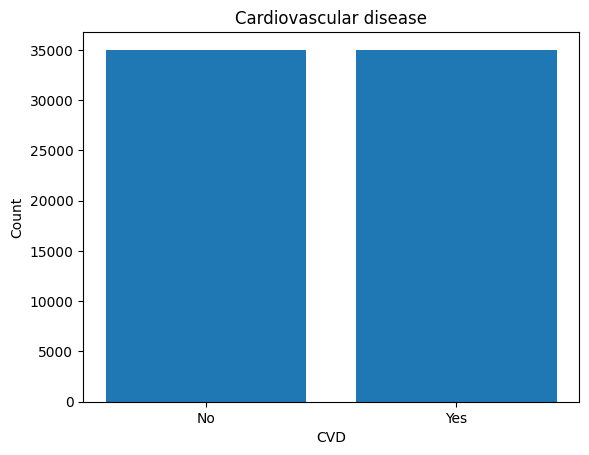

In [272]:
#Using matplotlib bar chart
#Return series with unique and value_counts
x= df['cardio'].unique()
y = df['cardio'].value_counts(sort = False)
plt.bar(x,y)
plt.title('Cardiovascular disease')
plt.xlabel('CVD')
plt.ylabel('Count')
plt.show()

CVD is the target variable. Upon plotting this we can see that there is 50|50 interpretation. This shows that there are equal patients with cardiovascular disease and patients without.

In [273]:
# high_outliers = (df['sys_bp']> 250) | (df['dia_bp'] >120)
# print(high_outliers.sum())
# print(df.loc[high_outliers,:])

In [274]:
df.describe()

,age,height,weight,sys_bp,dia_bp,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.801886,164.359229,74.205690,128.817286,96.630414,27.555330
std,6.762498,8.210126,14.395757,154.011419,188.472530,6.092593
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.500000
25%,49.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.400000
75%,59.000000,170.000000,82.000000,140.000000,90.000000,30.200000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.700000


In [275]:
# df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
# df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [276]:
df.describe()

,age,height,weight,sys_bp,dia_bp,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.801886,164.359229,74.205690,128.817286,96.630414,27.555330
std,6.762498,8.210126,14.395757,154.011419,188.472530,6.092593
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.500000
25%,49.000000,159.000000,65.000000,120.000000,80.000000,23.900000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.400000
75%,59.000000,170.000000,82.000000,140.000000,90.000000,30.200000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.700000


##Bivariate Exploration
In this we will see the relationship between the pair of variables in the data

In [277]:
#creating a list of my numeric variables
numeric_vars = ['height','weight','sys_bp','dia_bp','bmi']

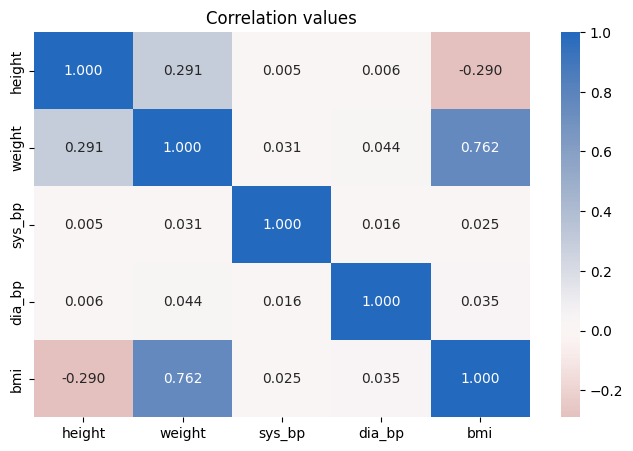

In [278]:

#correlation plot using my new dataframe
plt.figure(figsize=[8,5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation values')
plt.show()


From the observation of the above heat map, BMI and weight are highly correlated with one another than any of the other two whereas,   
Height seems to have least dependency(least correlation) with any of the other numeric value variables.   
We can also see that systolic bp and diastolic bp are correlated in higher manner.

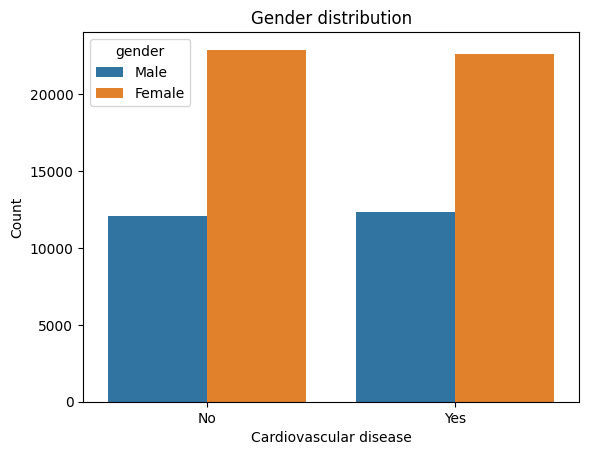

In [279]:

#using seaborns countplot
sb.countplot(data = df,x='cardio',hue='gender')
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Count');

The plot reveals a significantly higher incidence of cardiovascular disease among women in comparison to men.

In [280]:
# df['diastolic_category'] =((df['dia_bp']//10)*10).astype(int)

It rounds of the dia_bp values to the nearest multiples of 10 and stores it in the new column

## Scatter Plot

In [281]:
#using seaborn scatter plot and alpha to reduce overplotting and see distribution well
# plt.figure(figsize=[8,5])
# #setting a bse color
# base_color = sb.color_palette()[0]
# sb.stripplot(data= df,x='diastolic_category',y='sys_bp',jitter=0.35,color = base_color)
# #Setting axis and title labels
# plt.title('Systolic vs Diastolic: Blood pressure indicators')
# plt.xlabel('Diastolic(mmHg)')
# plt.ylabel('Systolic(mmHg)');

As previously mentioned, diastolic and systolic being correlated. It is now confirmed that these both are positively correlated which means increase in systolic bp increases diastolic bp. The majority of patients exhibited systolic blood pressures between 100 and 170 mmHg and diastolic pressures above 60 mmHg. Blood pressure management is individualized and varies across patients.

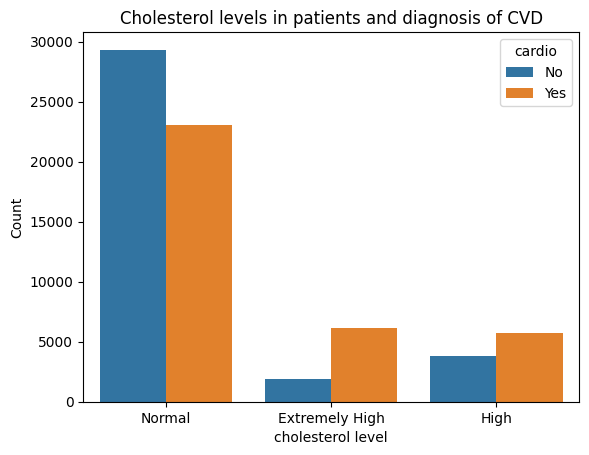

In [282]:
#using a clustered bar chart
sb.countplot(data = df,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

The plot demonstrates that cardiovascular disease can occur even in individuals with normal cholesterol levels, emphasizing the role of additional risk factors. Consequently, cholesterol will not be a focus of subsequent analysis.

In [283]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(df.shape[0],1000,replace = False)
cardio_subset = df.iloc[sample]

In [284]:
#creating a seed for reproducibility for random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from  original dataset to reduce overplotting
sample = np.random.choice(df.shape[0],1000,replace = False)
cardio_subset = df.iloc[sample]

The plot confirms the expected positive association between weight and BMI. A significant concentration of patients is observed within the weight range of 60-100 kg and BMI range of 18-35 kg/m². Given this established relationship, it will be insightful to investigate how weight and BMI influence the development of cardiovascular disease.

## Violin Plot

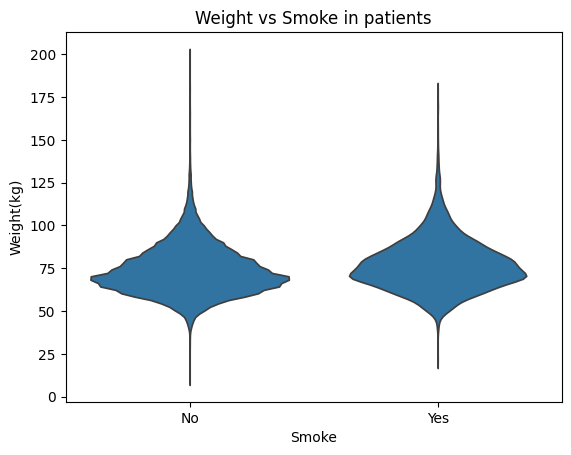

In [285]:
#Using seabornviolin plot to see the weight and smoking variable

#setting a base color
base_color = sb.color_palette()[0]

sb.violinplot(data=df, x='smoke', y='weight',color=base_color, inner=None)
plt.title('Weight vs Smoke in patients')
plt.xlabel('Smoke')
plt.ylabel('Weight(kg)');

The weight distribution for smokers and non-smokers appears similar, indicating no apparent association between smoking status and weight. Consequently, this variable will be excluded from further analysis.
  
This is the end of Bivarient Exploration

##Multivariate Exploration

In [286]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(df.shape[0],500,replace = False)
cardio_subset = df.iloc[sample]

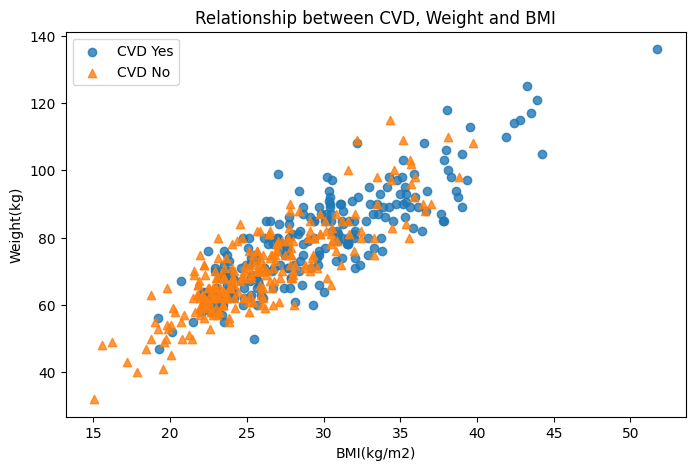

In [287]:
#setting my figure size
plt.figure(figsize=[8,5])
#Creating markers for the categories
cvd_markers =[['Yes','o'],['No','^']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data = plot_data,x='bmi',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI(kg/m2)')
plt.ylabel('Weight(kg)')
plt.legend(['CVD Yes','CVD No']);

A clear correlation exists between increased BMI and weight and the diagnosis of cardiovascular disease. Patients with a BMI above 25 and weight exceeding 80kg are significantly more likely to have been diagnosed with cardiovascular disease compared to those with lower values for these metrics.

In [288]:
# #Using seaborns stripplot using the diastolic category created
# plt.figure(figsize=[12,7])
# sb.stripplot(data=df,x='diastolic_category',y = 'sys_bp',hue='cardio',jitter = 0.35,dodge = True,size=4)
# #setting title and axis labels
# plt.title('Relationship between CVD, Systolic and Diastolic')
# plt.xlabel('Diastolic(mmHg)')
# plt.ylabel('Systolic(mmHg)')
# plt.legend(['Yes','No'],title='CVD');

 We used jitter and dodge to reduce overplotting. Previously, we observed a correlation between systolic and diastolic blood pressure, though it wasn't as strong as the correlation between weight and BMI. Despite this correlation, there are many outliers, indicating that the distribution of these variables doesn't fit a one-size-fits-all pattern. This suggests that blood pressure levels vary significantly among patients.

Considering this, I created a scatter plot with diastolic blood pressure as a category to examine its relationship with cardiovascular disease diagnosis. The distribution appears sparse. More than half of the data points have a systolic pressure greater than 125 and a diastolic pressure greater than 80. Interestingly, there are patients with a systolic pressure lower than 125 and a diastolic pressure lower than 80 who have cardiovascular disease, as well as patients with high systolic and high diastolic pressures both with and without cardiovascular disease.

This suggests that while systolic and diastolic pressures are used to measure blood pressure, having high blood pressure doesn't necessarily indicate the presence of cardiovascular disease. Other risk factors play a significant role in this patient population.

##Facet Grid

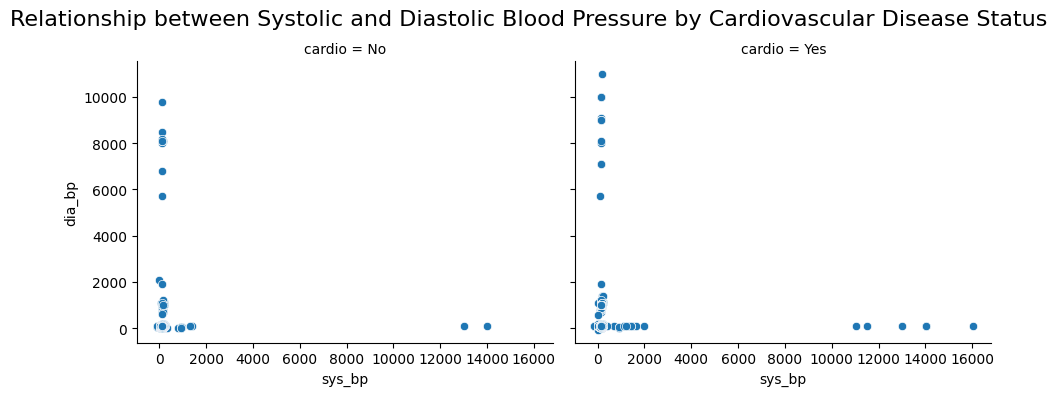

In [289]:
# Assuming 'df' is your dataframe and it contains 'sys_bp', 'dia_bp', and 'cardio' columns
g = sns.FacetGrid(df, col='cardio', height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='sys_bp', y='dia_bp')

# Adding a title to the whole plot
g.fig.suptitle('Relationship between Systolic and Diastolic Blood Pressure by Cardiovascular Disease Status', fontsize=16)
plt.subplots_adjust(top=0.85)  # Adjusting the title position
plt.show()

The FacetGrid plot reveals that both groups, with and without cardiovascular disease (CVD), exhibit a wide range of systolic and diastolic blood pressure values, with notable clustering of individuals having systolic blood pressure between 110-140 and diastolic blood pressure between 70-90. The group with CVD (cardio = Yes) shows a higher frequency of elevated systolic blood pressure values (above 140) compared to the non-CVD group. Despite this, the range of diastolic blood pressure remains consistent across both groups, spanning approximately from 60 to 100.

#Data Preprocessing

##1. Handling Missing Values

In [290]:

# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
sys_bp,0
dia_bp,0
cholesterol,0
gluc,0
smoke,0
alco,0


There are no remaining null values in our dataset as we have already processed and handled them

In [291]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 3184


In [292]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio,bmi
41915,53,Male,186,80.0,120,80,Normal,Normal,No,No,Yes,No,23.1
48830,53,Male,186,80.0,120,80,Normal,Normal,No,No,Yes,No,23.1
1751,46,Male,183,80.0,120,80,Normal,Normal,No,No,No,No,23.9
24137,46,Male,183,80.0,120,80,Normal,Normal,No,No,No,No,23.9
23200,58,Male,180,100.0,120,80,Normal,Normal,No,No,Yes,No,30.9


In [293]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 66816 datapoints remaining with 13 features


In [294]:
Continuous_features = [feature for feature in df.columns if len(df[feature].unique())>25]
print('Continuous Values are : {}'.format(Continuous_features))

Continuous Values are : ['age', 'height', 'weight', 'sys_bp', 'dia_bp', 'bmi']


#Checking imbalanced dataset .

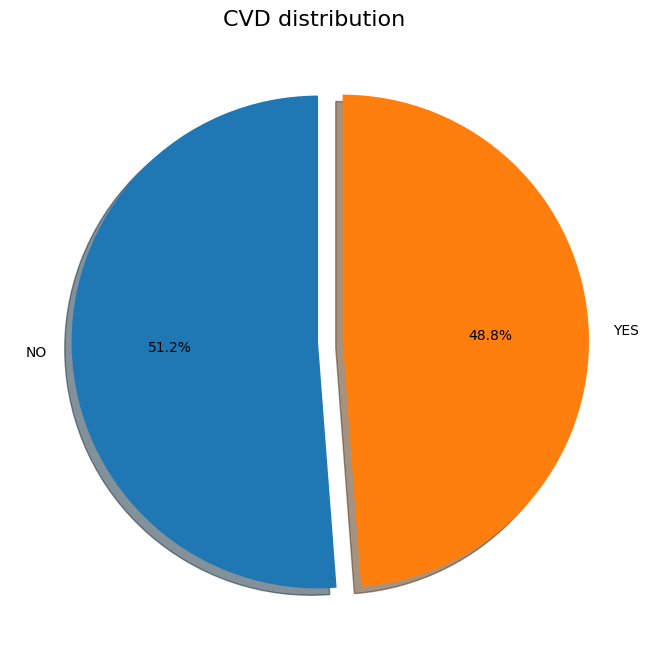

In [295]:

# calculate value counts of 'TenYearCHD' column
counts =df['cardio'].value_counts()


labels = ['NO','YES']
plt.figure(figsize=(10,8))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,.1])
plt.title('CVD distribution ', fontsize=16)
plt.show()


The data is not imbalanced as the probability of having the CVD is almost 50-50.. Therefore the results won't be biased.

In [296]:
# Replace string values back to their original numeric values
df['gender'] = df['gender'].replace({'Female': '1', 'Male': '2'})
df['cholesterol'] = df['cholesterol'].replace({'Normal': '1', 'High': '2', 'Extremely High': '3'})
df['gluc'] = df['gluc'].replace({'Normal': '1', 'High': '2', 'Extremely High': '3'})
df['smoke'] = df['smoke'].replace({'No': '0', 'Yes': '1'})
df['alco'] = df['alco'].replace({'No': '0', 'Yes': '1'})
df['active'] = df['active'].replace({'No': '0', 'Yes': '1'})
df['cardio'] = df['cardio'].replace({'No': '0', 'Yes': '1'})


In [297]:
df

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,51,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,56,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,49,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,1,165,80.0,150,80,1,1,0,0,1,1,29.4
69996,62,1,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,53,2,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,62,1,163,72.0,135,80,1,2,0,0,0,1,27.1


#**Normalization**

## Min-Max Scaling

In [298]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# normalized_data = scaler.fit_transform(df)

# # Convert back to a DataFrame
# normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# print(normalized_df.head())


The output shown in the image displays the first five rows of a normalized DataFrame. Each feature in the dataset has been scaled to a range between 0 and 1.

## Z-Score Normalization
(Standardization)

In [299]:
# scaler = StandardScaler()

# # Select columns to standardize (all numeric columns)
# columns_to_standardize = ['age', 'height', 'weight', 'sys_bp', 'dia_bp', 'cholesterol', 'gluc',
#                           'smoke', 'alco', 'active', 'cardio', 'bmi']

# # Standardize the selected columns
# df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# # Display the first few rows of the standardized data
# print("Standardized Data:\n", df.head())

Observation:The standardized data output shows how each feature in the dataset compares to its mean and standard deviation. For instance, the age values have been scaled, with the first row showing an age of -0.42, indicating it is below the mean. Height and weight values are also standardized, reflecting their deviation from the dataset's average. Blood pressure, cholesterol, and glucose levels follow the same transformation, providing a normalized view where values closer to 0 are near the mean, and negative or positive values indicate below or above average, respectively.

##Robust Scaler

In [300]:
# # Initialize the RobustScaler
# scaler = RobustScaler()

# # Select columns to robust scale (all numeric columns)
# columns_to_scale = ['age', 'height', 'weight', 'sys_bp', 'dia_bp', 'cholesterol', 'gluc',
#                     'smoke', 'alco', 'active', 'cardio', 'bmi']

# # Apply robust scaling to the selected columns
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# # Display the first few rows of the scaled data
# print("Robust Scaled Data:\n", df.head())

Observation:The output shows the dataset after applying RobustScaler, which reduces the effect of outliers. The values in columns like age, height, weight, and blood pressure are now centered around the median with reduced impact from extreme values. For instance, the first row's age value of -0.3 indicates it is slightly below the median age. This scaling method helps to stabilize the data for further analysis, making it more resilient to outliers

##Max Abs Scaler

In [301]:
# # Initialize the MaxAbsScaler
# scaler = MaxAbsScaler()

# # Select columns to scale (all numeric columns)
# columns_to_scale = ['age', 'height', 'weight', 'sys_bp', 'dia_bp', 'cholesterol', 'gluc',
#                     'smoke', 'alco', 'active', 'cardio', 'bmi']

# # Apply Max Abs Scaling to the selected columns
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# # Display the first few rows of the scaled data
# print("Max Abs Scaled Data:\n", df.head())


Observaton:The dataset has been scaled using MaxAbsScaler, which scales each feature by its maximum absolute value to range between -1 and 1. This scaling helps make the data consistent, reducing the influence of outliers. For example, an age value of -0.125 indicates it's proportionally half of the maximum age value. This transformation ensures that all features contribute equally to any analysis or modeling, making the dataset more robust and stable for further use.

#ML Model Implementation

In [302]:
## Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

## Warnings
import warnings
warnings.filterwarnings('ignore')

In [303]:
X = df.drop(['cardio'],axis=1)
y = df['cardio']

In [304]:
# url = '/content/drive/My Drive/Bit crew resources/cardio_train.csv'
# df1 = pd.read_csv(url,delimiter=';')


In [305]:
X.shape

(66816, 12)

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [307]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [308]:
print(f'The shape of x_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')


The shape of x_train is: (46771, 12)
The shape of y_train is: (46771,)
The shape of x_test is: (20045, 12)
The shape of y_test is: (20045,)


In [309]:
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### We are going to train and test our data on 5 model and compare the results:
1.Logistic Regression Classifier

2.Random Forest Classifier

3.Support Vector Machine

4.XGBoost

5.K Nearest Neighbors

6.Naive bayes

## 1)Logistic Regression

In [310]:
# Initialize the Logistic Regression model
logistic_regressor = LogisticRegression(random_state=0, max_iter=200)

# Train the model
logistic_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_regressor.predict(X_test)



## ML Model used and it's performance using Evaluation metric Score Chart.

### accuracy

In [311]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7121


### Confusion matrix

In [312]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[7087 2625]
 [3145 7188]]


### Heatmap for cm

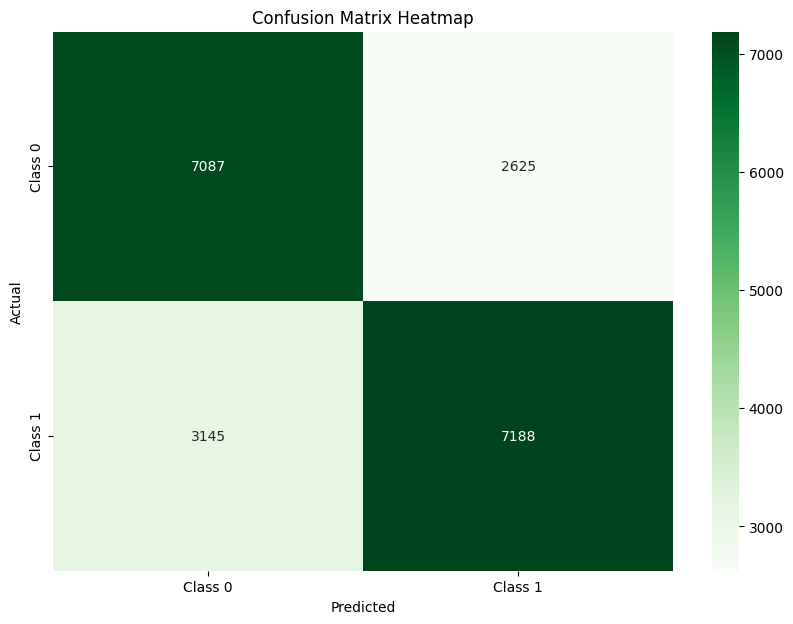

In [313]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))

# Replace 'target_names' with the actual labels
target_names = ['Class 0', 'Class 1'] # Replace with your actual target names
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Classification Report

In [314]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      9712
           1       0.73      0.70      0.71     10333

    accuracy                           0.71     20045
   macro avg       0.71      0.71      0.71     20045
weighted avg       0.71      0.71      0.71     20045



##  K nearest neighbour

In [315]:
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

# # Range of k values to test
# k_range = range(1,10)
# k_scores = []

# # Loop through k values
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # Perform 10-fold cross-validation
#     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     k_scores.append(scores.mean())

# # # Plotting the cross-validation accuracy as a function of k
# # plt.plot(k_range, k_scores)
# # plt.xlabel('Value of k for KNN')
# # plt.ylabel('Cross-Validated Accuracy')
# # plt.title('Finding the Optimal k')
# # plt.show()

# # Find the k with the highest accuracy
# best_k = k_range[k_scores.index(max(k_scores))]
# print(f'The best value of k is {best_k}')


In [316]:
# Initialize the K-Nearest Neighbors model with k=9
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_knn = knn_classifier.predict(X_test)
y_pred_prob = knn_classifier.predict_proba(X_test)


### Accuracy

In [317]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_knn) # Removed argmax as arrays are 1D
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6527


### confusion matrix

In [318]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn) # Removed argmax since arrays are 1D
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[6342 3370]
 [3591 6742]]


### heatmap for the confusion matrix

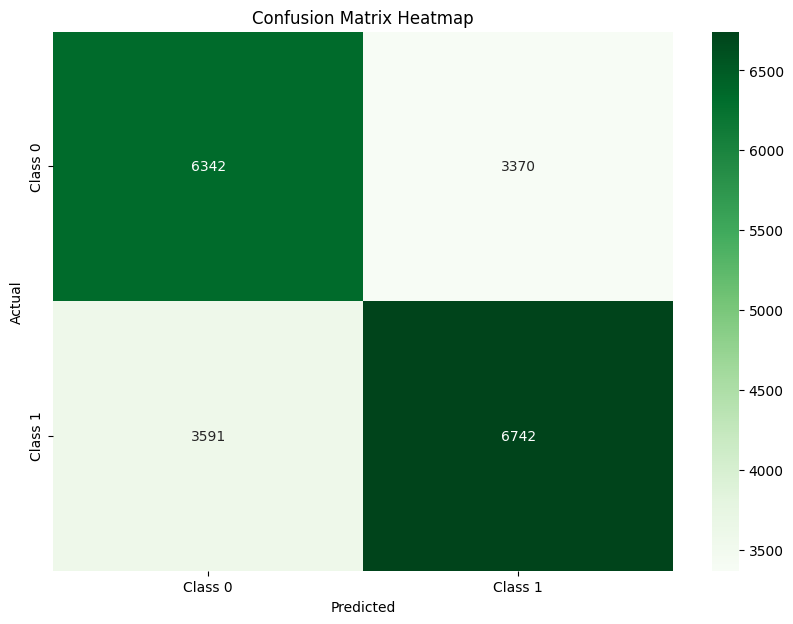

In [319]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
# target_names = data.target_names # 'data' is not defined, use the list from the global variables instead
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


### classification report

In [320]:
# Generate the classification report
class_report = classification_report(y_test, y_pred_knn, target_names=target_names) # Removed argmax since arrays are 1D
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.64      0.65      0.65      9712
     Class 1       0.67      0.65      0.66     10333

    accuracy                           0.65     20045
   macro avg       0.65      0.65      0.65     20045
weighted avg       0.65      0.65      0.65     20045



## Naive bayes

In [321]:
# Initialize the Naive Bayes model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_nb = nb_classifier.predict(X_test)
y_pred_prob = nb_classifier.predict_proba(X_test)

### accuracy

In [322]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_nb) # Removed argmax since arrays are 1D
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6037


### confusion matrix

In [323]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb) # Removed argmax since arrays are 1D
print('Confusion Matrix:')
print(conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_nb) # Removed argmax since arrays are 1D
print(f'Accuracy: {accuracy:.4f}')

Confusion Matrix:
[[7915 1797]
 [6146 4187]]
Accuracy: 0.6037


### heatmap for the confusion matrix

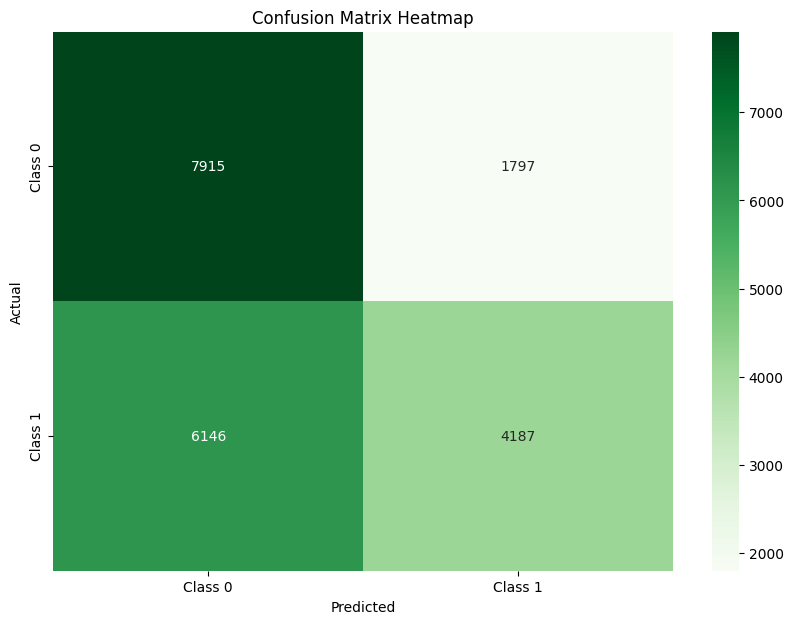

In [324]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
# Use the existing target_names variable
# target_names = df.target_names  <-- Remove this line
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

### classification report

In [325]:
# Generate the classification report
class_report = classification_report(y_test, y_pred_nb, target_names=target_names) # Removed argmax since arrays are 1D
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.56      0.81      0.67      9712
     Class 1       0.70      0.41      0.51     10333

    accuracy                           0.60     20045
   macro avg       0.63      0.61      0.59     20045
weighted avg       0.63      0.60      0.59     20045



##RANDOM FOREST MODEL

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [327]:
# Initialize the Random Forest model
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_rf = random_forest_classifier.predict(X_test)
y_pred_prob = random_forest_classifier.predict_proba(X_test)

In [328]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)  # Remove argmax as it's not needed for 1D arrays
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6974


In [329]:
# Generate the confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred_rf) # Remove argmax as it's not needed for 1D arrays
print('Confusion Matrix:')
print(conf_matrix1)

Confusion Matrix:
[[6681 3031]
 [3034 7299]]


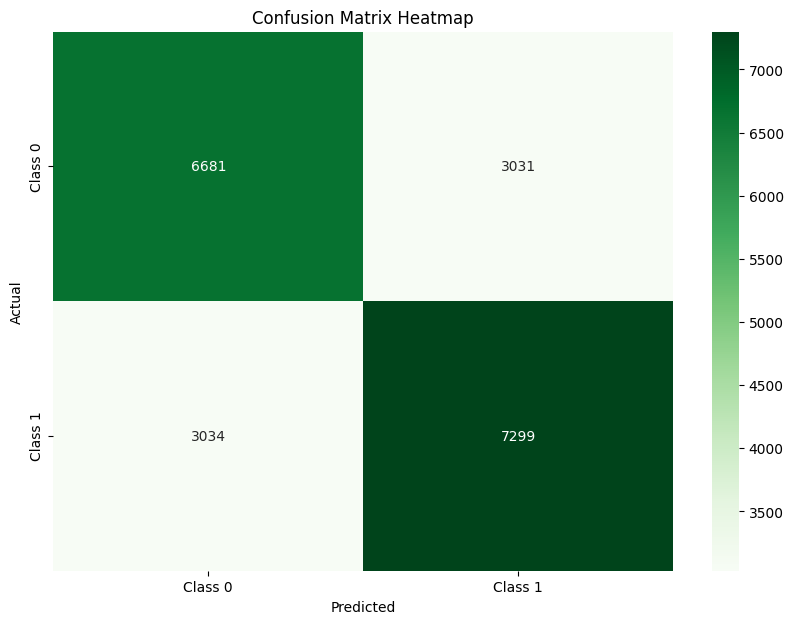

In [330]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
# target_names = data.target_names # 'data' is not defined, use the list from the global variables instead
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [331]:
# Generate the classification report
class_report1 = classification_report(y_test, y_pred_rf, target_names=target_names) # Remove argmax since y_test and y_pred are already 1D
print('Classification Report:')
print(class_report1)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.69      0.69      9712
     Class 1       0.71      0.71      0.71     10333

    accuracy                           0.70     20045
   macro avg       0.70      0.70      0.70     20045
weighted avg       0.70      0.70      0.70     20045



In [332]:
df

,age,gender,height,weight,sys_bp,dia_bp,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,51,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,56,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,49,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,1,165,80.0,150,80,1,1,0,0,1,1,29.4
69996,62,1,158,126.0,140,90,2,2,0,0,1,1,50.5
69997,53,2,183,105.0,180,90,3,1,0,1,0,1,31.4
69998,62,1,163,72.0,135,80,1,2,0,0,0,1,27.1


In [333]:
# Check the unique values in y_train and y_test
print(f"Unique values in y_train: {pd.Series(y_train).unique()}")
print(f"Unique values in y_test: {pd.Series(y_test).unique()}")


Unique values in y_train: ['1' '0']
Unique values in y_test: ['0' '1']


##XG BOOST

Train Result:
Accuracy Score: 76.56%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.744167      0.789087  0.765624      0.766627      0.767101
recall         0.794164      0.738264  0.765624      0.766214      0.765624
f1-score       0.768353      0.762830  0.765624      0.765591      0.765533
support    22892.000000  23879.000000  0.765624  46771.000000  46771.000000
_______________________________________________
Confusion Matrix: 
 [[18180  4712]
 [ 6250 17629]]



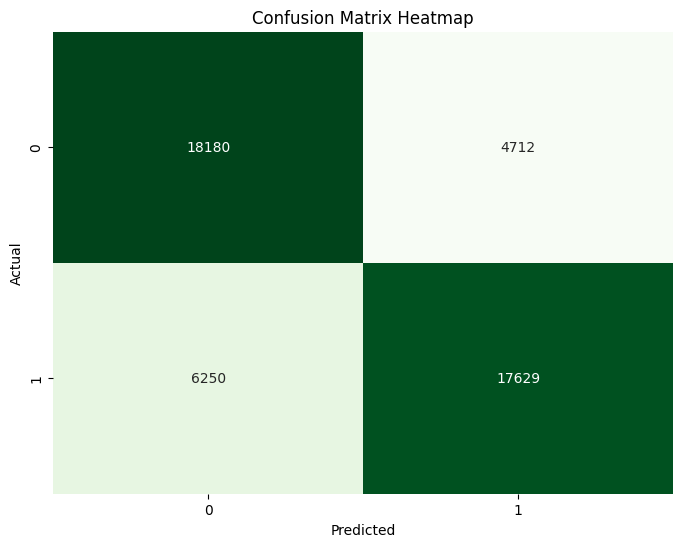

Test Result:
Accuracy Score: 72.85%
_______________________________________________
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.708130      0.749872  0.728511      0.729001      0.729648
recall        0.747941      0.710249  0.728511      0.729095      0.728511
f1-score      0.727491      0.729523  0.728511      0.728507      0.728539
support    9712.000000  10333.000000  0.728511  20045.000000  20045.000000
_______________________________________________
Confusion Matrix: 
 [[7264 2448]
 [2994 7339]]



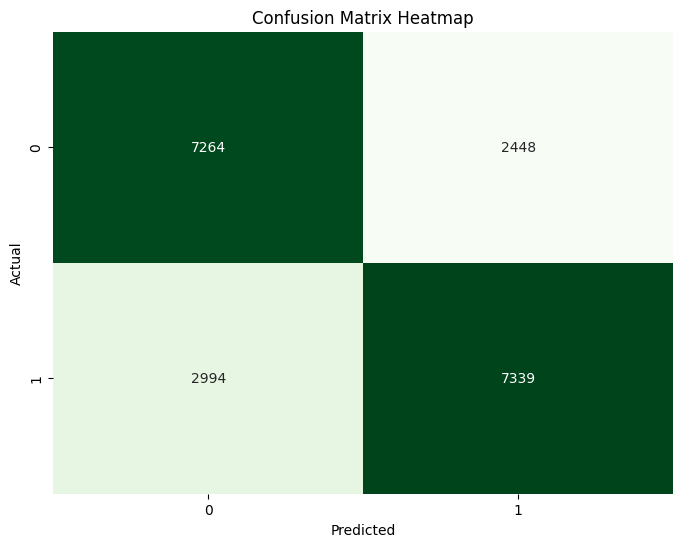

In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier

# Function to print the score of the model and plot the confusion matrix heatmap
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_train, pred)
        print(f"Confusion Matrix: \n {cm}\n")

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix: \n {cm}\n")

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title('Confusion Matrix Heatmap')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Convert the string values to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encoding for 'cholesterol' and 'gluc' (ordinal variables)
label_encoder = LabelEncoder()
X_train['cholesterol'] = label_encoder.fit_transform(X_train['cholesterol'])
X_train['gluc'] = label_encoder.fit_transform(X_train['gluc'])
X_test['cholesterol'] = label_encoder.transform(X_test['cholesterol'])
X_test['gluc'] = label_encoder.transform(X_test['gluc'])

# One-hot encoding for nominal variables
X_train = pd.get_dummies(X_train, columns=['gender', 'smoke', 'alco', 'active'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['gender', 'smoke', 'alco', 'active'], drop_first=True)

# Fit the model
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Print training and testing accuracy and plot confusion matrix heatmap
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)  # Training accuracy
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)  # Testing accuracy




In [335]:
import joblib

# Assuming xgb_clf is your trained XGBoost model
joblib.dump(xgb_clf, 'xgb_model.pkl')

['xgb_model.pkl']

##SVM

In [336]:
# # Train the SVM model
# from sklearn.svm import SVC
# svm_clf = SVC(kernel='linear')  # You can use other kernels like 'rbf', 'poly', etc.
# svm_clf.fit(X_train, y_train)

In [337]:
from sklearn import svm

# Establish non-linear SVM model
rbfsvm = svm.SVC(kernel='rbf', gamma=0.06, random_state=1)

# Train the model
rbfsvm.fit(X_train, y_train)

SVC(gamma=0.06, random_state=1)

###ACCURACY

In [338]:
# Use the trained model to make predictions
rbf_y_pred = rbfsvm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rbf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7029683212771265


In [339]:
# # Import the necessary module
# from sklearn import svm

# # Initialize the SVM model
# svm_classifier = svm.SVC(kernel='sigmoid', probability=True, random_state=0)

# # Train the model
# svm_classifier.fit(X_train, y_train)

# # Predict the test set results
# y_pred = svm_classifier.predict(X_test)
# y_pred_prob = svm_classifier.predict_proba(X_test)

In [340]:
# # Calculate and print the accuracy
# accuracy = accuracy_score(y_test, y_pred)  # Remove argmax as arrays are 1D
# print(f'Accuracy: {accuracy:.4f}')

### heatmap for the confusion matrix

In [341]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, rbf_y_pred) # Remove argmax as it's not needed for 1D arrays
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[6844 2868]
 [3086 7247]]


In [342]:
# # Classification report
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# clf_report = classification_report(y_test, y_pred)
# print(f"Classification Report:\n{clf_report}")

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix:\n{cm}")

# # Plot Confusion Matrix as heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix Heatmap')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

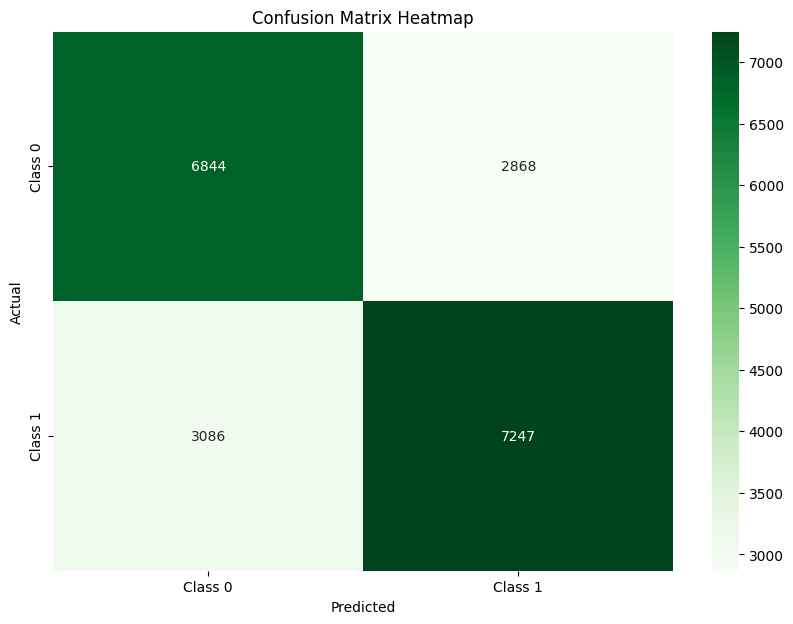

In [343]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
# target_names = df.target_names  # Removed this line as it was causing the error
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names) # Use the existing target_names variable
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


### classification report

In [344]:
# Generate the classification report
class_report = classification_report(y_test, rbf_y_pred, target_names=target_names) # Removed argmax as y_test and y_pred are 1D
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.70      0.70      9712
     Class 1       0.72      0.70      0.71     10333

    accuracy                           0.70     20045
   macro avg       0.70      0.70      0.70     20045
weighted avg       0.70      0.70      0.70     20045



In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert target labels to integers if necessary
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Now you can train the model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


# Define MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(16, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


NameError: name 'mlp_model' is not defined

In [ ]:
# Evaluate on test data
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


#Ensemble Learning

In [ ]:
pip install shap

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# # Load your data into a DataFrame (replace 'your_data.csv' with your actual data file)
# # df = pd.read_csv('your_data.csv')

# # Assuming 'cardio' is the target variable and the rest are features
# # X = df.drop('cardio', axis=1)
# # y = df['cardio']

# # # Normalize features
# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)

# # # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Define the base models
# model_1 = XGBClassifier(n_estimators=50, max_depth=3, n_jobs=-1, random_state=42)
# model_2 = RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=42)
# model_3 = LogisticRegression(solver='liblinear', random_state=42)
# model_4 = GaussianNB()

# # Create a list of the base models
# estimators = [
#     ('xg', model_1),
#     ('rf', model_2),
#     ('lg', model_3),
#     ('nb', model_4)
# ]

# # Define the stacking classifier
# stacking_clf = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression(solver='liblinear', random_state=42),
#     cv=5
# )

# # Train the stacking classifier
# stacking_clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = stacking_clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Ensemble Accuracy: {accuracy:.2f}')

# # You can also evaluate the individual base models if needed
# for name, model in estimators:
#     model.fit(X_train, y_train)
#     y_pred_base = model.predict(X_test)
#     accuracy_base = accuracy_score(y_test, y_pred_base)
#     print(f'{name} Accuracy: {accuracy_base:.2f}')


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# # from sklearn.metrics import accuracy_score
# # Ensure target variable is numeric (converting '0' and '1' as strings to integers)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# # Now, train the stacking classifier
# stacking_clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = stacking_clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Ensemble Accuracy: {accuracy:.2f}')

# # Evaluate individual base models
# for name, model in estimators:
#     model.fit(X_train, y_train)
#     y_pred_base = model.predict(X_test)
#     accuracy_base = accuracy_score(y_test, y_pred_base)
#     print(f'{name} Accuracy: {accuracy_base:.2f}')


# XAI

## SHAP

In [ ]:
pip install shap


In [ ]:
# Define the feature names without 'id'
feature_names = [
    'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active','cardio'
]

# Print the feature names
print("Feature Names:")
print(feature_names)

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(xgb_clf, X_train, feature_names=feature_names)

# Calculate SHAP values for the test set
shap_values = explainer(X2_test)



In [ ]:
# Ensure X2_train and X2_test have the correct shape
print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)

 X2_train has 49000 samples and 12 features, while X2_test has 21000 samples and the same 12 features.

In [ ]:
# Plot SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

In [ ]:
# Plot summary plot for all test set predictions
shap.summary_plot(shap_values, X2_test, feature_names=feature_names)

In [ ]:
df1

In [ ]:
import shap
import pandas as pd

# Assuming X2_test and X2_train are numpy arrays and feature_names is a list of feature names
X2_test_df = pd.DataFrame(X2_test, columns=feature_names)

# Create SHAP explainer object
explainer = shap.Explainer(xgb_clf, X2_train, feature_names=feature_names)

# Calculate SHAP values for the test set
shap_values = explainer(X2_test_df)

# Initialize JS visualization code
shap.initjs()

# Generate SHAP force plot for the first prediction
shap.force_plot(shap_values.base_values[0], shap_values.values[0], shap_values.data[0])


In [ ]:
print(type(shap_values))
print(shap_values.shape)
print(shap_values)


In [ ]:
# Bar plot
shap.summary_plot(shap_values, X2_test_df, feature_names=feature_names, plot_type='bar')


In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)


In [ ]:
# Waterfall plot for the first prediction
shap.plots.waterfall(shap_values[0])


In [ ]:
import shap
import pandas as pd

# Define feature names and their descriptions
feature_info = {
    'age': 'Enter your age (years): ',
    'gender': 'Gender (1: Female, 2: Male): ',
    'height': 'Enter your height (cm): ',
    'weight': 'Enter your weight (kg): ',
    'ap_hi': 'Systolic blood pressure (ap_hi): ',
    'ap_lo': 'Diastolic blood pressure (ap_lo): ',
    'cholesterol': 'Cholesterol level (1: normal, 2: above normal, 3: well above normal): ',
    'gluc': 'Glucose level (1: normal, 2: above normal, 3: well above normal): ',
    'smoke': 'Do you smoke? (1: Yes, 0: No): ',
    'alco': 'Do you drink alcohol? (1: Yes, 0: No): ',
    'active': 'Are you physically active? (1: Yes, 0: No): '
}

# Function to get custom input from the user
def get_custom_input():
    custom_input = {}
    print("Enter the following details:")

    for feature, description in feature_info.items():
        if feature in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
            value = int(input(description))
        else:
            value = float(input(description))
        custom_input[feature] = [value]

    return pd.DataFrame(custom_input, columns=feature_info.keys())

# Collect custom input
custom_input_df = get_custom_input()

# Ensure the custom input DataFrame matches the expected format
print("Custom input DataFrame:")
print(custom_input_df)

# Create SHAP explainer object
explainer = shap.Explainer(xgb_clf, X2_train, feature_names=list(feature_info.keys()))

# Calculate SHAP values for the custom input with additivity check disabled
try:
    shap_values_custom = explainer(custom_input_df, check_additivity=False)
except Exception as e:
    print(f"Error calculating SHAP values: {e}")

# Initialize JS visualization code
shap.initjs()

# Generate SHAP plots
print("Force Plot:")
shap.force_plot(shap_values_custom.base_values[0], shap_values_custom.values[0], custom_input_df.iloc[0])

print("Waterfall Plot:")
shap.plots.waterfall(shap_values_custom[0])

print("Decision Plot:")
shap.decision_plot(shap_values_custom.base_values[0], shap_values_custom.values[0], custom_input_df.iloc[0], feature_names=list(feature_info.keys()))


##LIME

In [ ]:
!pip install aix360

In [ ]:
!pip install lime

In [ ]:
print(f"X2_train shape: {X2_train.shape}")
print(f"X2_test shape: {X2_test.shape}")

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

In [ ]:
print(f"df1 shape:{df1.shape}")

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

# Assuming the feature names and model imports are done as specified
feature_names = [
    'age', 'gender', 'height', 'weight', 'sys_bp', 'dia_bp',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi', 'diastolic_category'
]

# Convert X2_train and X2_test to DataFrames with the correct column names
X2_train_df = pd.DataFrame(X2_train, columns=feature_names[:X2_train.shape[1]])
X2_test_df = pd.DataFrame(X2_test, columns=feature_names[:X2_test.shape[1]])

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X2_train_df),
    feature_names=X2_train_df.columns.tolist(),
    class_names=['No', 'Yes'],
    mode='classification'
)

# Function to get prediction probabilities for SVM
def svm_predict_proba(x):
    decision = rbfsvm.decision_function(x)
    return np.column_stack((1 - decision, decision))

# Function to explain a single prediction and include a conclusion
def explain_prediction(model, x_instance, use_predict_proba=True):
    if use_predict_proba:
        predict_proba_func = model.predict_proba
    else:
        predict_proba_func = svm_predict_proba

    explanation = explainer.explain_instance(x_instance, predict_proba_func, num_features=len(X2_train_df.columns))

    # Show the explanation in the notebook
    explanation.show_in_notebook(show_table=True, show_all=False)

    # Save the explanation as an HTML file
    explanation.save_to_file('lime_explanation.html')

    # Plot feature importances
    features = explanation.as_list()
    labels, scores = zip(*features)

    plt.figure(figsize=(12, 8))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('LIME Explanation: Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()

    # Print out the feature importances and conclusion
    print("\nFeature Contributions:")
    for label, score in features:
        if score > 0:
            impact = 'increases the chances of having heart disease'
        else:
            impact = 'decreases the chances of having heart disease'
        print(f"{label}: {score:.4f} ({impact})")

    # Print the model's prediction and conclusion
    if use_predict_proba:
        prediction_prob = model.predict_proba([x_instance])[0]
    else:
        prediction_prob = svm_predict_proba([x_instance])[0]

    predicted_class = 'Heart Disease' if prediction_prob[1] > 0.5 else 'No Heart Disease'
    print(f"\nModel Prediction: {predicted_class}")
    print(f"Probability of Heart Disease: {prediction_prob[1]:.4f}")
    print(f"Probability of No Heart Disease: {prediction_prob[0]:.4f}")

# Test the explanation with an instance from X2_test
i = 0  # Change to any valid index
x_instance = X2_test_df.iloc[i]

# Example to explain prediction from XGBoost
display(HTML("<h2><b>Explaining prediction from XGBoost model:</b></h2>"))
explain_prediction(xgb_clf, x_instance)

# Example to explain prediction from Random Forest
display(HTML("<h2><b>Explaining prediction from Random Forest model:</b></h2>"))
explain_prediction(random_forest_classifier, x_instance)

# Example to explain prediction from SVM
display(HTML("<h2><b>Explaining prediction from SVM model:</b></h2>"))
explain_prediction(svm_predict_proba, x_instance, use_predict_proba=False)

In [ ]:
df1

In [ ]:
import pandas as pd

# Assuming X2 and df1 are already defined

# Print the shape of X2
print("Shape of X2:", X2.shape)

# Print the shape of df1
print("Shape of df1:", df1.shape)

# Additional Information (Optional)
print("\nColumns in X2:")
print(X2.columns)

print("\nColumns in df1:")
print(df1.columns)

**All Features only**

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Define the feature names
feature_names = [
    'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active'
]

# Load and preprocess df1 (assume df1 is already preprocessed and loaded)
X = df1[feature_names]
y = df1['cardio']  # Assuming 'cardio' is the target variable

# Initialize the XGBoost classifier (assuming xgb_clf is your trained model)
import xgboost as xgb

# Ensure the model is trained (assuming xgb_clf is already trained)
xgb_clf = xgb.XGBClassifier(random_state=0)
xgb_clf.fit(X, y)

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=feature_names,
    class_names=['No', 'Yes'],
    mode='classification'
)

def explainModelWithLime(model, input_data):
    """
    Explain the prediction for a given input using LIME.

    Parameters:
    model: Trained XGBoost model
    input_data: Dictionary with input feature values

    Returns:
    Explanation object
    """
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Generate LIME explanation
    exp = explainer.explain_instance(input_df.iloc[0].values, model.predict_proba, num_features=len(feature_names))

    # Get model prediction and confidence
    outcome = 'Yes' if model.predict(input_df)[0] == 1 else 'No'
    confidence = model.predict_proba(input_df)[0][1] if outcome == 'Yes' else model.predict_proba(input_df)[0][0]

    # Display LIME explanation
    exp.show_in_notebook(show_table=True)

    # Print prediction details
    print('Prediction:', outcome)
    print(f'Confidence: {confidence:.4f}')

    print('-----------------------------')
    print(f'The model is {round(confidence * 100, 4)}% confident this patient has cardiovascular disease: {outcome}.')

    if outcome == 'Yes':
        print('The model predicts that the patient has cardiovascular disease based on the following feature contributions:')
    else:
        print('The model predicts that the patient does not have cardiovascular disease based on the following feature contributions:')

    # Plot feature importances
    features = exp.as_list()
    labels, scores = zip(*features)
    plt.figure(figsize=(12, 8))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel('Feature Contribution')
    plt.title('LIME Explanation: Feature Contributions')
    plt.gca().invert_yaxis()
    plt.show()

    # Print out the feature contributions for a clearer explanation
    print("\nFeature Contributions:")
    for label, score in features:
        impact = 'increases the risk' if score > 0 else 'decreases the risk'
        print(f"{label}: {score:.4f} ({impact})")

    return exp

In [ ]:
# Example input data for a single patient
input_data = {
    'age': 50,
    'gender': 1,
    'height': 160,
    'weight': 70,
    'ap_hi': 120,
    'ap_lo': 80,
    'cholesterol': 1,
    'gluc': 1,
    'smoke': 0,
    'alco': 0,
    'active': 1
}

# Display explanation for the custom input
display(HTML("<h2><b>Explaining prediction from XGBoost model:</b></h2>"))
explainModelWithLime(xgb_clf, input_data)

**All features and top 5 features**

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Assuming the feature names are defined as specified
feature_names = [
    'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active'
]

# Assuming df1 is your dataset and it's already loaded and preprocessed
X = df1[feature_names]
y = df1['cardio']  # Assuming 'cardio' is the column name for the target variable

# Assuming xgb_clf is your already trained XGBoost model
import xgboost as xgb

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=feature_names,
    class_names=['No', 'Yes'],
    mode='classification'
)

def explainModelWithLime(model, input_data):
    """
    Explain the prediction for a given input using LIME.

    Parameters:
    model: Trained XGBoost model
    input_data: Dictionary with input feature values

    Returns:
    Explanation object
    """
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Generate LIME explanation
    exp = explainer.explain_instance(input_df.iloc[0].values, model.predict_proba, num_features=len(feature_names))

    # Get model prediction and confidence
    outcome = 'Yes' if model.predict(input_df)[0] == 1 else 'No'
    confidence = model.predict_proba(input_df)[0][1] if outcome == 'Yes' else model.predict_proba(input_df)[0][0]

    # Display LIME explanation
    exp.show_in_notebook(show_table=True)

    # Print prediction details
    print('Prediction:', outcome)
    print(f'Confidence: {confidence:.4f}')

    print('-----------------------------')
    print(f'The model is {round(confidence * 100, 4)}% confident this patient has cardiovascular disease: {outcome}.')

    if outcome == 'Yes':
        print('The model predicts that the patient has cardiovascular disease based on the following feature contributions:')
    else:
        print('The model predicts that the patient does not have cardiovascular disease based on the following feature contributions:')

    # Extract feature contributions
    features = exp.as_list()

    # Plot all feature contributions
    plt.figure(figsize=(14, 8))
    all_labels, all_scores = zip(*features)
    plt.barh(all_labels, all_scores, color='skyblue')
    plt.xlabel('Feature Contribution')
    plt.title('LIME Explanation: All Feature Contributions')
    plt.gca().invert_yaxis()
    plt.show()

    # Extract top 5 features
    top_5_features = sorted(features, key=lambda x: abs(x[1]), reverse=True)[:5]
    top_labels, top_scores = zip(*top_5_features)

    # Plot top 5 feature contributions
    plt.figure(figsize=(14, 8))
    plt.barh(top_labels, top_scores, color='salmon')
    plt.xlabel('Feature Contribution')
    plt.title('LIME Explanation: Top 5 Feature Contributions')
    plt.gca().invert_yaxis()
    plt.show()

    # Print out the feature contributions for a clearer explanation
    print("\nFeature Contributions:")
    for label, score in features:
        impact = 'increases the risk' if score > 0 else 'decreases the risk'
        print(f"{label}: {score:.4f} ({impact})")

    # Print out the top 5 feature contributions
    print("\nTop 5 Feature Contributions:")
    for label, score in top_5_features:
        impact = 'increases the risk' if score > 0 else 'decreases the risk'
        print(f"{label}: {score:.4f} ({impact})")

    return exp

In [ ]:
# Example input data for a single patient
input_data = {
    'age': 50,
    'gender': 1,
    'height': 160,
    'weight': 70,
    'ap_hi': 120,
    'ap_lo': 80,
    'cholesterol': 1,
    'gluc': 1,
    'smoke': 0,
    'alco': 0,
    'active': 1
}

# Display explanation for the custom input
display(HTML("<h2><b>Explaining prediction from XGBoost model:</b></h2>"))
explainModelWithLime(xgb_clf, input_data)

In [ ]:
`# Example input data for a single patient
input_data1 = {
    'age': 55,
    'gender': 1,
    'height': 156,
    'weight': 85,
    'ap_hi': 140,
    'ap_lo': 90,
    'cholesterol': 3,
    'gluc': 1,
    'smoke': 0,
    'alco': 0,
    'active': 1
}

# Display explanation for the custom input
display(HTML("<h2><b>Explaining prediction from XGBoost model:</b></h2>"))
explainModelWithLime(xgb_clf, input_data1)